<a href="https://colab.research.google.com/github/emnordi/ce888/blob/master/Project2/Project2_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import io
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

os.environ['KAGGLE_USERNAME'] = "emilnordin" # username from the json file

os.environ['KAGGLE_KEY'] = "fd1ae7405c909d36a1ecffea5cd2749a" # key from the json file

DOWNLOADING AND IMPORTING DATASET

In [0]:
!kaggle datasets download -d subediaarjun/unbalanced-fraud-detection-dataset

unbalanced-fraud-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
#This dataset happened to be in excel format requiring some extra steps
!unzip unbalanced-fraud-detection-dataset.zip

Archive:  unbalanced-fraud-detection-dataset.zip
replace Fraud Detection Sample data.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [0]:
data_fraud = pd.read_excel("Fraud Detection Sample data.xlsx", sheet_name = 'credit_card_fraud_sample', header = 0)

PRINTING DATASETS

In [0]:
print(data_fraud)

          ID        V1        V2        V3  ...       V27       V28  Amount  Class
0     221547 -1.191668  0.428409  1.640028  ... -0.319964 -0.017444   27.44      0
1     184524  1.966614 -0.450087 -1.228586  ... -0.039155 -0.071314   35.95      0
2      91201  1.528452 -1.296191 -0.890677  ...  0.042997  0.025853   28.40      0
3      26115 -0.774614  1.100916  0.679080  ...  0.282940  0.123856   43.20      0
4     201292 -1.075860  1.361160  1.496972  ...  0.951130  0.158996    0.83      1
...      ...       ...       ...       ...  ...       ...       ...     ...    ...
7295   96789 -3.593476  0.781442 -1.822448  ... -1.478767  0.722673  101.50      1
7296   18809  0.923764  0.344048 -2.880004  ...  0.489035 -0.049729   30.30      1
7297  197586 -0.361428  1.133472 -2.971360  ... -0.001250 -0.182751  480.72      1
7298  184379 -1.141559  1.927650 -3.905356  ... -0.146102  0.076211   25.00      1
7299  145800 -0.419820 -1.155978 -2.092516  ... -0.021363  0.129096  451.27      1

[73

DISPLAY AMOUNT OF ROWS EACH CLASS HAS, AND IMBALANCE OF DATASETS

In [0]:
print(data_fraud['Class'].value_counts())
print("Imbalance:", data_fraud['Class'].value_counts()[0]/sum(data_fraud.Class.value_counts()))

0    6972
1     328
Name: Class, dtype: int64
Imbalance: 0.955068493150685


BASE RESULTS

In [0]:
#Create decision tree and random forest classifiers
tree_clf = tree.DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [0]:
#Retrieves a classifier, features and labels to perform cross-validation and display results
def evaluatePerformance(clf, features, labels):
  a = cross_val_score(tree_clf, features, labels, cv=10, scoring='accuracy')
  p = cross_val_score(tree_clf, features, labels, cv=10, scoring='precision')
  r = cross_val_score(tree_clf, features, labels, cv=10, scoring='recall')
  f = cross_val_score(tree_clf, features, labels, cv=10, scoring='f1')

  print("Accuracy:", a.mean(), "+/-", a.std())
  print("Precision:", p.mean(), "+/-", p.std())
  print("Recall:", r.mean(), "+/-", r.std())
  print("F1-Score:", f.mean(), "+/-", f.std())

In [0]:
#Fraud dataset base scores DT
feat_fraud = data_fraud.drop('Class', axis=1)
lab_fraud = data_fraud['Class']

evaluatePerformance(rf_clf, feat_fraud, lab_fraud)

Accuracy: 0.9784931506849315 +/- 0.005649750856794877
Precision: 0.7837433451305875 +/- 0.08872218614627476
Recall: 0.7607007575757576 +/- 0.19600033267626282
F1-Score: 0.7430508668262178 +/- 0.1341771381777081


In [0]:
#Fraud dataset base scores RF
evaluatePerformance(rf_clf, feat_fraud, lab_fraud)

Accuracy: 0.9784931506849315 +/- 0.005649750856794877
Precision: 0.7837433451305875 +/- 0.08872218614627476
Recall: 0.7607007575757576 +/- 0.19600033267626282
F1-Score: 0.7430508668262178 +/- 0.1341771381777081


DOWNSAMPLING THE DATASETS AND RETRIEVING NEW PERFORMANCE RESULTS

In [0]:
#Downsample FRAUD DATASET to get 50%
data_fraud_ind_ = data_fraud[data_fraud['Class'] == 0].index
f_to_del = data_fraud_ind_[0:int(len(data_fraud_ind_)*0.952)]
data_fraud_test = data_fraud.drop(index=f_to_del)

print(data_fraud_test['Class'].value_counts())
print("Imbalance:", data_fraud_test['Class'].value_counts()[0]/(data_fraud_test['Class'].value_counts()[1]+(data_fraud_test['Class'].value_counts()[0])))

0    335
1    328
Name: Class, dtype: int64
Imbalance: 0.5052790346907994


In [0]:
#Fraud dataset downsample scores DT
feat_fraud_test = data_fraud_test.drop('Class', axis=1)
lab_fraud_test = data_fraud_test['Class']

evaluatePerformance(tree_clf, feat_fraud_test, lab_fraud_test)

Accuracy: 0.8630936227951154 +/- 0.08513958333321879
Precision: 0.8746967474541003 +/- 0.04662622126324715
Recall: 0.8481060606060605 +/- 0.18909265809335843
F1-Score: 0.8452735455304451 +/- 0.13710989687909192


In [0]:
#Fraud dataset downsample scores RF
evaluatePerformance(rf_clf, feat_fraud_test, lab_fraud_test)

Accuracy: 0.8630936227951154 +/- 0.08513958333321879
Precision: 0.8746967474541003 +/- 0.04662622126324715
Recall: 0.8481060606060605 +/- 0.18909265809335843
F1-Score: 0.8452735455304451 +/- 0.13710989687909192


OVERSAMPLING AND TEST RESULTS

In [0]:
#OVERSAMPLING FRAUD DATASET
max_ = data_fraud['Class'].value_counts().max()

temp = [data_fraud]
for class_index, group in data_fraud.groupby('Class'):
    temp.append(group.sample(max_-len(group), replace=True))
data_fraud_over = pd.concat(temp)

print(data_fraud_over['Class'].value_counts())
print("Imbalance:", data_fraud_over['Class'].value_counts()[0]/(data_fraud_over['Class'].value_counts()[1]+(data_fraud_over['Class'].value_counts()[0])))

1    6972
0    6972
Name: Class, dtype: int64
Imbalance: 0.5


In [0]:
#Fraud dataset oversampling scores DT
feat_fraud_over = data_fraud_over.drop('Class', axis=1)
lab_fraud_over = data_fraud_over['Class']
evaluatePerformance(tree_clf, feat_fraud_over, lab_fraud_over)

Accuracy: 0.994979713364496 +/- 0.0017278035291132688
Precision: 0.9900716209474073 +/- 0.003386129923013376
Recall: 1.0 +/- 0.0
F1-Score: 0.9950081349864359 +/- 0.0017098728963469876


In [0]:
#Fraud dataset oversampling scores RF
evaluatePerformance(rf_clf, feat_fraud_over, lab_fraud_over)

Accuracy: 0.994979713364496 +/- 0.0017278035291132688
Precision: 0.9900716209474073 +/- 0.003386129923013376
Recall: 1.0 +/- 0.0
F1-Score: 0.9950081349864359 +/- 0.0017098728963469876


CREATE 10 FOLDS OF EACH CLASS

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, accuracy_score, precision_score, recall_score, f1_score
import utils
from sklearn.metrics.cluster import adjusted_rand_score 

In [0]:
#FRAUD DATASET
skf = StratifiedKFold(n_splits=10)
feat_fraud = np.array(feat_fraud)
lab_fraud = np.array(lab_fraud)

In [0]:
random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifiers = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

[[ 1.68312000e+05 -2.00783374e+00 -2.39754453e+00 ... -4.38861024e-01
  -9.30018837e-03  1.00000000e+03]
 [ 3.43330000e+04 -1.79351865e+00 -1.73711087e+00 ... -1.30091969e-01
   9.80834914e-02  4.57540000e+02]
 [ 9.33790000e+04  1.42519630e+00 -4.36587933e-01 ...  1.20438924e-02
   5.66051788e-03  7.02000000e+00]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


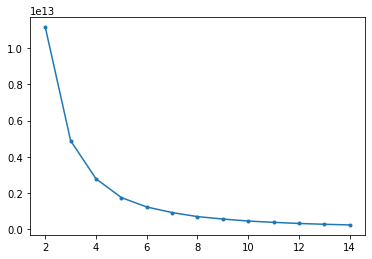

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


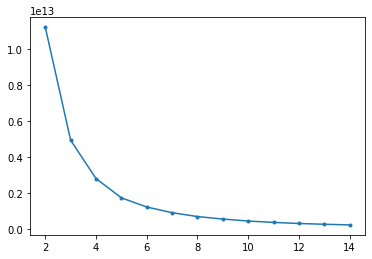

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


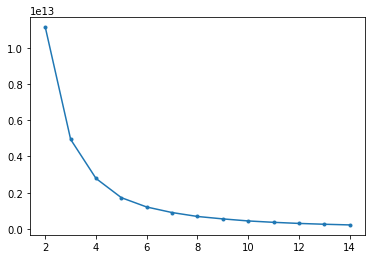

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


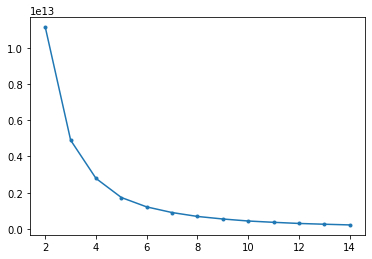

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


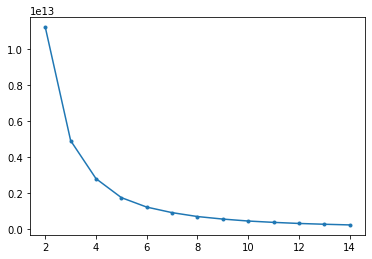

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


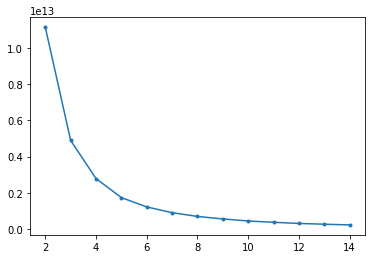

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


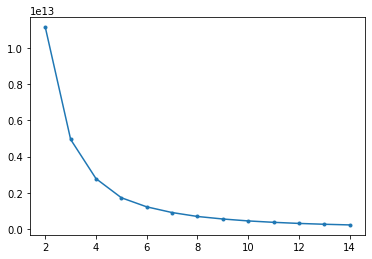

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


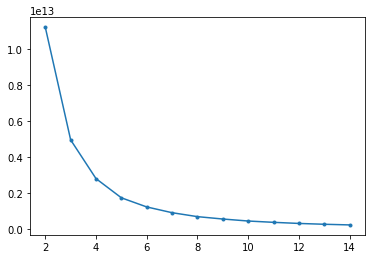

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 1.97586000e+05 -3.61427839e-01  1.13347192e+00 ... -1.24981707e-03
  -1.82750897e-01  4.80720000e+02]
 [ 1.84379000e+05 -1.14155894e+00  1.92765004e+00 ... -1.46101644e-01
   7.62114891e-02  2.50000000e+01]
 [ 1.45800000e+05 -4.19820174e-01 -1.15597801e+00 ... -2.13631449e-02
   1.29096386e-01  4.51270000e+02]]
finding clusters


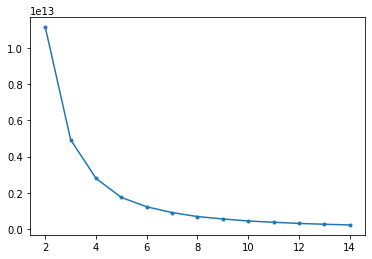

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2
[[ 2.21547000e+05 -1.19166848e+00  4.28408570e-01 ... -3.19964326e-01
  -1.74444289e-02  2.74400000e+01]
 [ 1.84524000e+05  1.96661435e+00 -4.50086974e-01 ... -3.91549993e-02
  -7.13139301e-02  3.59500000e+01]
 [ 9.12010000e+04  1.52845161e+00 -1.29619125e+00 ...  4.29974926e-02
   2.58531705e-02  2.84000000e+01]
 ...
 [ 7.01410000e+04 -1.64927882e+00  1.26397356e+00 ...  3.90808553e-01
   1.12145531e-01  1.12450000e+02]
 [ 2.34632000e+05  1.26132424e+00  2.72680029e+00 ...  4.68180887e-01
   2.80486471e-01  1.59000000e+00]
 [ 2.22133000e+05 -3.61385046e+00 -9.22135693e-01 ...  1.05544197e+00
   9.99714026e-02  1.44800000e+02]]
finding clusters


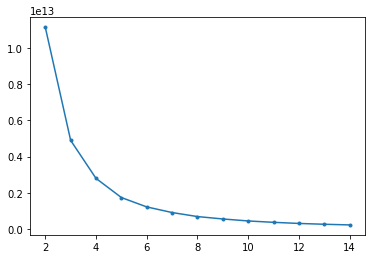

Silhouette predicted 2 clusters. Please enter elbow results:
2
K value with best performance: 2


In [0]:
for train, test in skf.split(feat_fraud, lab_fraud):
  test_labels = []

  #Retrieve the predicted amount of clusters and the best performing KMeans model
  n_clusters, final_model = utils.Utils.cluster_and_model(feat_fraud[train], lab_fraud[train])

  #Retrieve the clusters containing missclassified data and the indices of these clusters in the training data
  missclassified_cluster_data_index, missclassified_clusters = utils.Utils.find_missclassified_clusters(n_clusters, lab_fraud[train], final_model.labels_)
  rf_classifiers = [0]*n_clusters
  #Go through the clusters with missclassified data and train a random forest classifier for each
  for i in missclassified_clusters:
    f = feat_fraud[train]
    f1 = f[missclassified_cluster_data_index[i], :]
    l  = lab_fraud[train]
    l1 = np.take(l, missclassified_cluster_data_index[i])
    rf_classifiers[i] = random_forest_clf.fit(f1, l1)
  
  #For each point in test dataset, give it a cluster
  for x in feat_fraud[test]:
    prediction = final_model.predict(np.array([x]))
    if prediction in missclassified_clusters:
      test_labels.append(rf_classifiers[prediction[0]].predict(np.array([x])))
    else:
      test_labels.append(prediction)
  accuracy_scores.append(accuracy_score(test_labels, lab_fraud[test]))
  precision_scores.append(precision_score(test_labels, lab_fraud[test]))
  recall_scores.append(recall_score(test_labels, lab_fraud[test]))
  f1_scores.append(f1_score(test_labels, lab_fraud[test]))

EVALUATING RESULTS FROM PROPOSED ALGORITHM

In [0]:
print("Accuracy:", np.mean(accuracy_scores), "+/-", np.std(accuracy_scores))
print("Precision:", np.mean(precision_scores), "+/-", np.std(precision_scores))
print("Recall:", np.mean(recall_scores), "+/-", np.std(recall_scores))
print("F1-Score:", np.mean(f1_scores), "+/-", np.std(f1_scores))

Accuracy: 0.9863013698630138 +/- 0.00912785273915488
Precision: 0.6997159090909091 +/- 0.2092706402883787
Recall: 0.9918060200668897 +/- 0.0164263082816201
F1-Score: 0.7959989663001226 +/- 0.19946340240378294


APPLYING SMOTE SAMPLING

In [0]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
smote_feat, smote_lab = sm.fit_resample(feat_fraud, lab_fraud)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


EVALUATING RESULTS FROM SMOTE

In [0]:
#Evaluate using decision tree
evaluatePerformance(tree_clf, smote_feat, smote_lab)

Accuracy: 0.9731069663637812 +/- 0.004896048964116521
Precision: 0.9669345489589501 +/- 0.006987978081900309
Recall: 0.9797745557094876 +/- 0.007579782979086342
F1-Score: 0.9732819379105632 +/- 0.0048960693508108685


In [0]:
#Evaluate using random forest
evaluatePerformance(rf_clf, smote_feat, smote_lab)

Accuracy: 0.9731069663637812 +/- 0.004896048964116521
Precision: 0.9669345489589501 +/- 0.006987978081900309
Recall: 0.9797745557094876 +/- 0.007579782979086342
F1-Score: 0.9732819379105632 +/- 0.0048960693508108685
